# PREDICTION OF Revenue and Genre

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',3998)

import warnings
warnings.filterwarnings('ignore')

## Reading The Data

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df.drop(['id','original_title','title','status','homepage','tagline','overview'],axis=1,inplace=True)
#Dropped the columns which are unnecessary.

In [5]:
df.shape

(4803, 13)

## Checking Null Values

In [6]:
df.isnull().sum()

budget                  0
genres                  0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
vote_average            0
vote_count              0
dtype: int64

## Checking Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
keywords                4803 non-null object
original_language       4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 487.9+ KB


## Converting Float Type to Int Type

In [8]:
df['popularity']=df['popularity'].astype('int64')

## Release Date Splitting

In [9]:
data_a = df['release_date'].str.split('-',0,expand=True)
df['release_date'] = data_a[0]

## Genres Splitting

In [10]:
df['genres'].head(3)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [11]:
data_b = df['genres'].str.split(':',2,expand=True)
data_b.head(3)

,0,1,2
0,"[{""id""","28, ""name""","""Action""}, {""id"": 12, ""name"": ""Adventure""}, {..."
1,"[{""id""","12, ""name""","""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, ..."
2,"[{""id""","28, ""name""","""Action""}, {""id"": 12, ""name"": ""Adventure""}, {..."


In [12]:
data_c = data_b[2].str.split('}',1,expand=True)
data_c.head(3)

,0,1
0,"""Action""",", {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ..."
1,"""Adventure""",", {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""n..."
2,"""Action""",", {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ..."


In [13]:
data_d = data_c[0].str.split('"',1,expand=True)
data_d.head(3)

,0,1
0,,"Action"""
1,,"Adventure"""
2,,"Action"""


In [14]:
data_f = data_d[1].str.split('"',0,expand=True)
data_f.head(3)

,0,1
0,Action,
1,Adventure,
2,Action,


In [15]:
data_f[0].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: 0, dtype: int64

In [16]:
df['genres'] = data_f[0]

In [17]:
df.head()

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,Action,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,Adventure,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500
2,245000000,Action,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466
3,250000000,Action,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106
4,260000000,Action,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124


## Keywords Splitting

In [18]:
df['keywords'].head(3)

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
Name: keywords, dtype: object

In [19]:
data_g = df['keywords'].str.split(':',2,expand=True)
data_g.head(3)

,0,1,2
0,"[{""id""","1463, ""name""","""culture clash""}, {""id"": 2964, ""name"": ""futur..."
1,"[{""id""","270, ""name""","""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, ..."
2,"[{""id""","470, ""name""","""spy""}, {""id"": 818, ""name"": ""based on novel""}..."


In [20]:
data_h = data_g[2].str.split('}',1,expand=True)
data_h.head(3)

,0,1
0,"""culture clash""",", {""id"": 2964, ""name"": ""future""}, {""id"": 3386,..."
1,"""ocean""",", {""id"": 726, ""name"": ""drug abuse""}, {""id"": 91..."
2,"""spy""",", {""id"": 818, ""name"": ""based on novel""}, {""id""..."


In [21]:
data_i = data_h[0].str.split('"',1,expand=True)
data_i.head(3)

,0,1
0,,"culture clash"""
1,,"ocean"""
2,,"spy"""


In [22]:
data_j = data_i[1].str.split('"',0,expand=True)
data_j.head(3)

,0,1
0,culture clash,
1,ocean,
2,spy,


In [23]:
data_j[0].value_counts().head(10)

based on novel             94
independent film           87
new york                   73
london england             61
prison                     60
suicide                    48
paris                      44
woman director             43
sex                        42
father son relationship    39
Name: 0, dtype: int64

In [24]:
df['keywords'] = data_j[0]

In [25]:
df['keywords'].mode()

0    based on novel
dtype: object

## Production Companies Splitting

In [26]:
df['production_companies'].value_counts().head(3)

[]                                            351
[{"name": "Paramount Pictures", "id": 4}]      58
[{"name": "Universal Pictures", "id": 33}]     45
Name: production_companies, dtype: int64

In [27]:
data_k = df['production_companies'].str.split(':',1,expand=True)
data_k.head(3)

,0,1
0,"[{""name""","""Ingenious Film Partners"", ""id"": 289}, {""name..."
1,"[{""name""","""Walt Disney Pictures"", ""id"": 2}, {""name"": ""J..."
2,"[{""name""","""Columbia Pictures"", ""id"": 5}, {""name"": ""Danj..."


In [28]:
data_l = data_k[1].str.split('"',1,expand=True)
data_l.head(3)

,0,1
0,,"Ingenious Film Partners"", ""id"": 289}, {""name"":..."
1,,"Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jer..."
2,,"Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq..."


In [29]:
data_m = data_l[1].str.split('"',1,expand=True)
data_m.head(3)

,0,1
0,Ingenious Film Partners,", ""id"": 289}, {""name"": ""Twentieth Century Fox ..."
1,Walt Disney Pictures,", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films""..."
2,Columbia Pictures,", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {..."


In [30]:
data_m[0].value_counts().head(3)

Paramount Pictures    281
Universal Pictures    260
Columbia Pictures     200
Name: 0, dtype: int64

In [31]:
df['production_companies'] = data_m[0]

## Production Countries Splitting

In [32]:
df['production_countries'].head(3)

0    [{"iso_3166_1": "US", "name": "United States o...
1    [{"iso_3166_1": "US", "name": "United States o...
2    [{"iso_3166_1": "GB", "name": "United Kingdom"...
Name: production_countries, dtype: object

In [33]:
data_n = df['production_countries'].str.split('"',3,expand=True)
data_n.head(3)

,0,1,2,3
0,[{,iso_3166_1,:,"US"", ""name"": ""United States of America""}, {""is..."
1,[{,iso_3166_1,:,"US"", ""name"": ""United States of America""}]"
2,[{,iso_3166_1,:,"GB"", ""name"": ""United Kingdom""}, {""iso_3166_1"":..."


In [34]:
data_o = data_n[3].str.split('"',1,expand=True)
data_o.head(3)

,0,1
0,US,", ""name"": ""United States of America""}, {""iso_3..."
1,US,", ""name"": ""United States of America""}]"
2,GB,", ""name"": ""United Kingdom""}, {""iso_3166_1"": ""U..."


In [35]:
df['production_countries'] = data_o[0]

## Spoken Languages Splitting

In [36]:
df['spoken_languages'].head(3)

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
Name: spoken_languages, dtype: object

In [37]:
data_p = df['spoken_languages'].str.split('"',3,expand=True)
data_p.head(3)

,0,1,2,3
0,[{,iso_639_1,:,"en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""..."
1,[{,iso_639_1,:,"en"", ""name"": ""English""}]"
2,[{,iso_639_1,:,"fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""..."


In [38]:
data_q = data_p[3].str.split('"',1,expand=True)
data_q.head(3)

,0,1
0,en,", ""name"": ""English""}, {""iso_639_1"": ""es"", ""nam..."
1,en,", ""name"": ""English""}]"
2,fr,", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""en""..."


In [39]:
df['spoken_languages'] = data_q[0]

In [40]:
df.head()

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,Action,culture clash,en,150,Ingenious Film Partners,US,2009,2787965087,162.0,en,7.2,11800
1,300000000,Adventure,ocean,en,139,Walt Disney Pictures,US,2007,961000000,169.0,en,6.9,4500
2,245000000,Action,spy,en,107,Columbia Pictures,GB,2015,880674609,148.0,fr,6.3,4466
3,250000000,Action,dc comics,en,112,Legendary Pictures,US,2012,1084939099,165.0,en,7.6,9106
4,260000000,Action,based on novel,en,43,Walt Disney Pictures,US,2012,284139100,132.0,en,6.1,2124


In [41]:
df.isnull().sum()

budget                    0
genres                   28
keywords                412
original_language         0
popularity                0
production_companies    351
production_countries    174
release_date              1
revenue                   0
runtime                   2
spoken_languages         86
vote_average              0
vote_count                0
dtype: int64

In [42]:
df.dropna(inplace=True)
df['runtime'] = df['runtime'].astype('int64')
df['release_date'] = df['release_date'].astype('int64')

In [43]:
df.shape

(4162, 13)

In [44]:
1-4162/4803

0.13345825525713095

### 13.3% data is missed,we can neglect that one

In [45]:
df.head()

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,Action,culture clash,en,150,Ingenious Film Partners,US,2009,2787965087,162,en,7.2,11800
1,300000000,Adventure,ocean,en,139,Walt Disney Pictures,US,2007,961000000,169,en,6.9,4500
2,245000000,Action,spy,en,107,Columbia Pictures,GB,2015,880674609,148,fr,6.3,4466
3,250000000,Action,dc comics,en,112,Legendary Pictures,US,2012,1084939099,165,en,7.6,9106
4,260000000,Action,based on novel,en,43,Walt Disney Pictures,US,2012,284139100,132,en,6.1,2124


# Now our Data is Cleaned

In [46]:
for i in df.select_dtypes('object').columns:
    print( "---- %s ---" % i)
    print(df[i].value_counts().head(3))

---- genres ---
Drama     1019
Comedy     883
Action     685
Name: genres, dtype: int64
---- keywords ---
based on novel    93
new york          72
london england    61
Name: keywords, dtype: int64
---- original_language ---
en    3927
fr      56
es      27
Name: original_language, dtype: int64
---- production_companies ---
Paramount Pictures    274
Universal Pictures    252
Columbia Pictures     197
Name: production_companies, dtype: int64
---- production_countries ---
US    2796
GB     342
CA     196
Name: production_countries, dtype: int64
---- spoken_languages ---
en    3628
fr      96
es      74
Name: spoken_languages, dtype: int64


## Outliers:

In [47]:
q1_b = df['budget'].quantile(q= 0.25)
q3_b = df['budget'].quantile(q= 0.75)
iqr_b = q3_b-q1_b
budget_o = df[(df['budget']<(q1_b-1.5*iqr_b)) | (df['budget']>(q3_b+1.5*iqr_b))].shape[0]
budget_o

265

In [48]:
q1_r = df['runtime'].quantile(q= 0.25)
q3_r = df['runtime'].quantile(q= 0.75)
iqr_r = q3_r-q1_r
runtime_o = df[(df['runtime']<(q1_r-1.5*iqr_r)) | (df['runtime']>(q3_r+1.5*iqr_r))].shape[0]
runtime_o

131

In [49]:
q1_va = df['vote_average'].quantile(q= 0.25)
q3_va = df['vote_average'].quantile(q= 0.75)
iqr_va = q3_va-q1_va
va_o = df[(df['vote_average']<(q1_va-1.5*iqr_va)) | (df['vote_average']>(q3_va+1.5*iqr_va))].shape[0]
va_o

74

In [50]:
q1_vc = df['vote_count'].quantile(q= 0.25)
q3_vc = df['vote_count'].quantile(q= 0.75)
iqr_vc = q3_vc-q1_vc
vc_o = df[(df['vote_count']<(q1_vc-1.5*iqr_vc)) | (df['vote_count']>(q3_vc+1.5*iqr_vc))].shape[0]
vc_o

423

In [51]:
Features = ['Budget','Runtime','Vote_average','Vote_count']
No_of_outliers = [budget_o,runtime_o,va_o,vc_o]
Outliers  = pd.DataFrame({'Features':Features,'No_of_Outliers':No_of_outliers})
Outliers

,Features,No_of_Outliers
0,Budget,265
1,Runtime,131
2,Vote_average,74
3,Vote_count,423


## Outliers Treatment - Sqrt Transformation:

In [52]:
df1 = df.copy()

In [53]:
from sklearn.preprocessing import FunctionTransformer
ft_sqrt = FunctionTransformer(np.sqrt)
ft_log = FunctionTransformer(np.log1p)

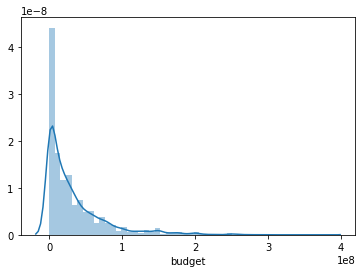

In [54]:
sns.distplot(df1['budget'])

In [55]:
df1['budget'] = ft_sqrt.fit_transform(df1[['budget']])

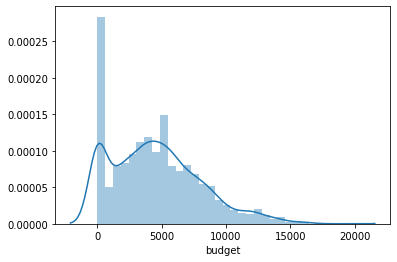

In [56]:
sns.distplot(df1['budget'])

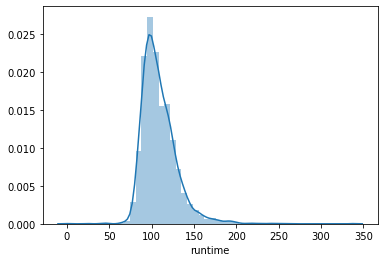

In [57]:
sns.distplot(df1['runtime'])

In [58]:
df1['runtime'] = ft_sqrt.fit_transform(df1[['runtime']])

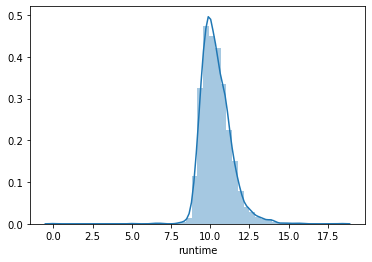

In [59]:
sns.distplot(df1['runtime'])

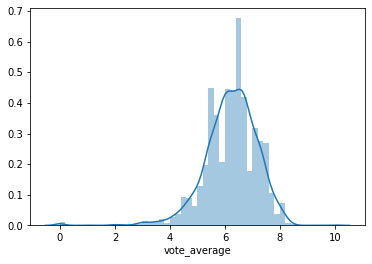

In [60]:
sns.distplot(df1['vote_average'])

In [61]:
df1['vote_average'] = ft_sqrt.fit_transform(df1[['vote_average']])

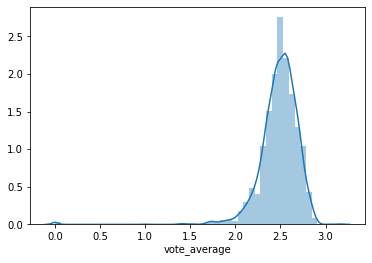

In [62]:
sns.distplot(df1['vote_average'])

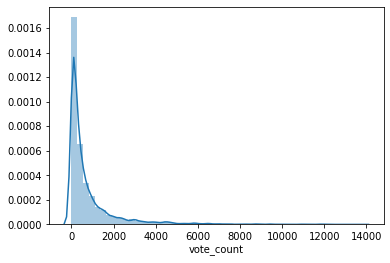

In [63]:
sns.distplot(df1['vote_count'])

In [64]:
df1['vote_count'] = ft_sqrt.fit_transform(df1[['vote_count']])

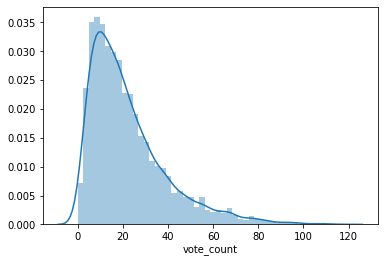

In [65]:
sns.distplot(df1['vote_count'])

In [66]:
q1_b_s = df1['budget'].quantile(q= 0.25)
q3_b_s = df1['budget'].quantile(q= 0.75)
iqr_b_s = q3_b_s-q1_b_s
budget_o_s = df1[(df1['budget']<(q1_b_s-1.5*iqr_b_s)) | (df1['budget']>(q3_b_s+1.5*iqr_b_s))].shape[0]
budget_o_s

47

In [67]:
q1_r_s = df1['runtime'].quantile(q= 0.25)
q3_r_s = df1['runtime'].quantile(q= 0.75)
iqr_r_s = q3_r_s-q1_r_s
runtime_o_s = df1[(df1['runtime']<(q1_r_s-1.5*iqr_r_s)) | (df1['runtime']>(q3_r_s+1.5*iqr_r_s))].shape[0]
runtime_o_s

108

In [68]:
q1_va_s = df1['vote_average'].quantile(q= 0.25)
q3_va_s = df1['vote_average'].quantile(q= 0.75)
iqr_va_s = q3_va_s-q1_va_s
va_o_s = df1[(df1['vote_average']<(q1_va_s-1.5*iqr_va_s)) | (df1['vote_average']>(q3_va_s+1.5*iqr_va_s))].shape[0]
va_o_s

103

In [69]:
q1_vc_s = df1['vote_count'].quantile(q= 0.25)
q3_vc_s = df1['vote_count'].quantile(q= 0.75)
iqr_vc_s = q3_vc_s-q1_vc_s
vc_o_s = df1[(df1['vote_count']<(q1_vc_s-1.5*iqr_vc_s)) | (df1['vote_count']>(q3_vc_s+1.5*iqr_vc_s))].shape[0]
vc_o_s

190

In [70]:
Features = ['Budget','Runtime','Vote_average','Vote_count']
No_of_outliers = [budget_o,runtime_o,va_o,vc_o]
No_of_outlier_after_sqrt_transformation = [budget_o_s,runtime_o_s,va_o_s,vc_o_s]
Outliers_after_sqrt  = pd.DataFrame({'Features':Features,'No_of_Outliers':No_of_outliers,
                          'No_of_outlier_after_sqrt_transformation':No_of_outlier_after_sqrt_transformation})
Outliers_after_sqrt

,Features,No_of_Outliers,No_of_outlier_after_sqrt_transformation
0,Budget,265,47
1,Runtime,131,108
2,Vote_average,74,103
3,Vote_count,423,190


## Outliers Treatment - Log Transformation

In [71]:
df2 = df.copy()

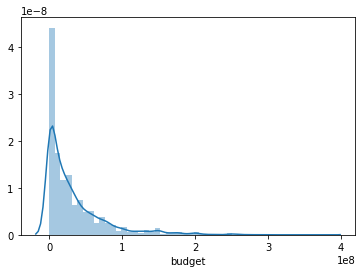

In [72]:
sns.distplot(df2['budget'])

In [73]:
df2['budget'] = ft_log.fit_transform(df2[['budget']])

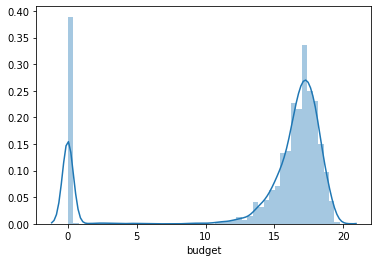

In [74]:
sns.distplot(df2['budget'])

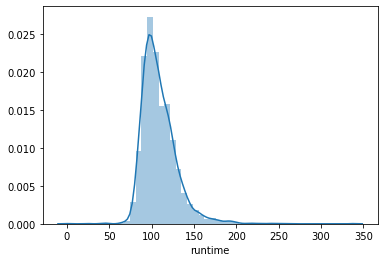

In [75]:
sns.distplot(df2['runtime'])

In [76]:
df2['runtime'] = ft_log.fit_transform(df2[['runtime']])

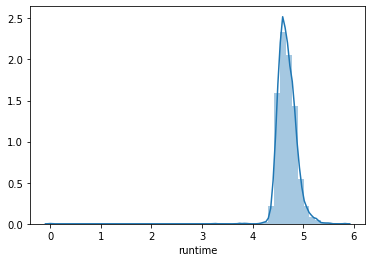

In [77]:
sns.distplot(df2['runtime'])

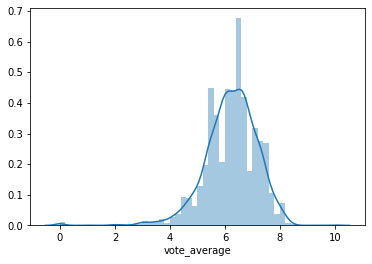

In [78]:
sns.distplot(df2['vote_average'])

In [79]:
df2['vote_average'] = ft_log.fit_transform(df2[['vote_average']])

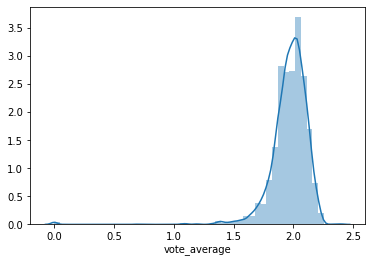

In [80]:
sns.distplot(df2['vote_average'])

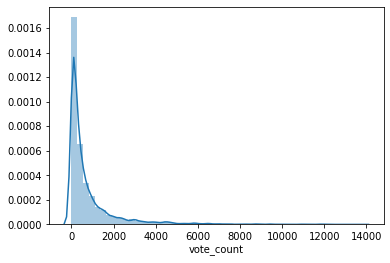

In [81]:
sns.distplot(df2['vote_count'])

In [82]:
df2['vote_count'] = ft_log.fit_transform(df2[['vote_count']])

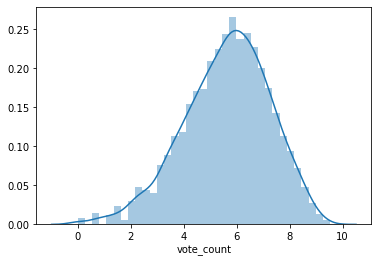

In [83]:
sns.distplot(df2['vote_count'])

In [84]:
q1_b_l = df2['budget'].quantile(q= 0.25)
q3_b_l = df2['budget'].quantile(q= 0.75)
iqr_b_l = q3_b_l-q1_b_l
budget_o_l = df2[(df2['budget']<(q1_b_l-1.5*iqr_b_l)) | (df2['budget']>(q3_b_l+1.5*iqr_b_l))].shape[0]
budget_o_l

670

In [85]:
q1_r_l = df2['runtime'].quantile(q= 0.25)
q3_r_l = df2['runtime'].quantile(q= 0.75)
iqr_r_l = q3_r_l-q1_r_l
runtime_o_l = df2[(df2['runtime']<(q1_r_l-1.5*iqr_r_l)) | (df2['runtime']>(q3_r_l+1.5*iqr_r_l))].shape[0]
runtime_o_l

86

In [86]:
q1_va_l = df2['vote_average'].quantile(q= 0.25)
q3_va_l = df2['vote_average'].quantile(q= 0.75)
iqr_va_l = q3_va_l-q1_va_l
va_o_l = df2[(df2['vote_average']<(q1_va_l-1.5*iqr_va_l)) | (df2['vote_average']>(q3_va_l+1.5*iqr_va_l))].shape[0]
va_o_l

117

In [87]:
q1_vc_l = df2['vote_count'].quantile(q= 0.25)
q3_vc_l = df2['vote_count'].quantile(q= 0.75)
iqr_vc_l = q3_vc_l-q1_vc_l
vc_o_l = df2[(df2['vote_count']<(q1_vc_l-1.5*iqr_vc_l)) | (df2['vote_count']>(q3_vc_l+1.5*iqr_vc_l))].shape[0]
vc_o_l

40

In [88]:
Features = ['Budget','Runtime','Vote_average','Vote_count']
No_of_outliers = [budget_o,runtime_o,va_o,vc_o]
No_of_outlier_after_sqrt_transformation = [budget_o_s,runtime_o_s,va_o_s,vc_o_s]
No_of_outlier_after_log_transformation = [budget_o_l,runtime_o_l,va_o_l,vc_o_l]
Outliers_after_log  = pd.DataFrame({'Features':Features,'No_of_Outliers':No_of_outliers,
                           'No_of_outlier_after_log_transformation':No_of_outlier_after_log_transformation})
Outliers_after_log

,Features,No_of_Outliers,No_of_outlier_after_log_transformation
0,Budget,265,670
1,Runtime,131,86
2,Vote_average,74,117
3,Vote_count,423,40


In [89]:
Features = ['Budget','Runtime','Vote_average','Vote_count']
No_of_outliers = [budget_o,runtime_o,va_o,vc_o]
No_of_outlier_after_sqrt_transformation = [budget_o_s,runtime_o_s,va_o_s,vc_o_s]
No_of_outlier_after_log_transformation = [budget_o_l,runtime_o_l,va_o_l,vc_o_l]
Outliers_after_transformation  = pd.DataFrame({'Features':Features,'No_of_Outliers':No_of_outliers,
                          'No_of_outlier_after_sqrt_transformation':No_of_outlier_after_sqrt_transformation,
                           'No_of_outlier_after_log_transformation':No_of_outlier_after_log_transformation})
Outliers_after_transformation

,Features,No_of_Outliers,No_of_outlier_after_sqrt_transformation,No_of_outlier_after_log_transformation
0,Budget,265,47,670
1,Runtime,131,108,86
2,Vote_average,74,103,117
3,Vote_count,423,190,40


After doing Square Root and log transformation, Budget outliers are mostly gone by Square Root Transformation,Runtime outliers are mostly gone by Log Transformation, Vote_average outliers are not gone but increased, Vote_count outliers are mostly gone by log transformation.

## Transformation:

In [90]:
df['budget'] = ft_sqrt.fit_transform(df[['budget']])
df['runtime'] = ft_log.fit_transform(df[['runtime']])
df['vote_count'] = ft_log.fit_transform(df[['vote_count']])

In [91]:
df.head()

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,15394.804318,Action,culture clash,en,150,Ingenious Film Partners,US,2009,2787965087,5.093750,en,7.2,9.375940
1,17320.508076,Adventure,ocean,en,139,Walt Disney Pictures,US,2007,961000000,5.135798,en,6.9,8.412055
2,15652.475842,Action,spy,en,107,Columbia Pictures,GB,2015,880674609,5.003946,fr,6.3,8.404472
3,15811.388301,Action,dc comics,en,112,Legendary Pictures,US,2012,1084939099,5.111988,en,7.6,9.116799
4,16124.515497,Action,based on novel,en,43,Walt Disney Pictures,US,2012,284139100,4.890349,en,6.1,7.661527


In [92]:
df.select_dtypes('object').columns

Index(['genres', 'keywords', 'original_language', 'production_companies',
       'production_countries', 'spoken_languages'],
      dtype='object')

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.select_dtypes('object').columns:
    df[i] = le.fit_transform(df[i])

In [94]:
df.head()

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,15394.804318,0,295,6,150,546,61,2009,2787965087,5.093750,13,7.2,9.375940
1,17320.508076,1,827,6,139,1126,61,2007,961000000,5.135798,13,6.9,8.412055
2,15652.475842,0,1113,6,107,236,26,2015,880674609,5.003946,18,6.3,8.404472
3,15811.388301,0,309,6,112,621,61,2012,1084939099,5.111988,13,7.6,9.116799
4,16124.515497,0,99,6,43,1126,61,2012,284139100,4.890349,13,6.1,7.661527


In [95]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
####
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
#####
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgboost

In [96]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

In [97]:
lr = LinearRegression()

dt = DecisionTreeRegressor()
et = ExtraTreeRegressor()


br = BaggingRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgb = xgboost.XGBRegressor()

In [98]:
X = df.drop('revenue',axis=1)
y = df['revenue']

In [99]:
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     443.8
Date:                Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:52:31   Log-Likelihood:                -83102.
No. Observations:                4162   AIC:                         1.662e+05
Df Residuals:                    4149   BIC:                         1.663e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.817e+08   3.16e+08      1.206      0.228   -2.39e+08       1e+09
budget                2.035e+04    712.997     28.543      0.000     1.9e+04    2.17e+04
genres               -1.051e+06   3.84e+05     -2.741      0.006    -1.8e+06   -2.99e+05
keywords              4942.7603   4656.116      1.062      0.288   -4185.722    1.41e+04
original_language     7.704e+05   7.29e+05      1.057      0.291   -6.59e+05     2.2e+06
popularity            1.973e+06   6.89e+04     28.623      0.000    1.84e+06    2.11e+06
production_companies  1657.6467   5178.938      0.320      0.749   -8495.847    1.18e+04
production_countries  3.066e+05   9.49e+04      3.230      0.001     1.2e+05    4.93e+05
release_date          -2.93e+05   1.52e+05     -1.933      0.053    -5.9e+05    4219.321
runtime               1.231e+07   1.04e+07      1.179      0.239   -8.16e+06    3.28e+07
spoken_languages     -1.147e+05   3.32e+05     -0.345      0.730   -7.66e+05    5.37e+05
vote_average          6.044e+06   2.27e+06      2.665      0.008     1.6e+06    1.05e+07
vote_count            8.368e+06   1.75e+06      4.775      0.000    4.93e+06    1.18e+07
==============================================================================
Omnibus:                     3726.929   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           423033.363
Skew:                           3.792   Prob(JB):                         0.00
Kurtosis:                      51.805   Cond. No.                     1.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
budget,1.970211
genres,1.045731
keywords,1.003447
original_language,1.320557
popularity,1.687386
production_companies,1.038377
production_countries,1.040773
release_date,1.206237
runtime,1.248416
spoken_languages,1.263734


### Here,we can know that there is no multi - collinearity. between the features.

In [101]:
train = []
test = []
mae = []
mape = []
rmse = []

In [102]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [103]:
def root_mean_squared_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [104]:
metrics = [mean_absolute_error,mean_absolute_percentage_error,root_mean_squared_error]

In [105]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

### Linear Regression:

In [106]:
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
print('R2_Score of Train: ',lr.score(xtrain,ytrain))
train.append(lr.score(xtrain,ytrain))
print('R2_Score of Test: ',lr.score(xtest,ytest))
test.append(lr.score(xtest,ytest))
print('Mean Absolute error',mean_absolute_error(ytest,ypred))
mae.append(mean_absolute_error(ytest,ypred))
print('Mean Absolute percentage error',mean_absolute_percentage_error(ytest,ypred))
mape.append(mean_absolute_percentage_error(ytest,ypred))
print('Root Mean Squared error',root_mean_squared_error(ytest,ypred))
rmse.append(root_mean_squared_error(ytest,ypred))

R2_Score of Train:  0.592129499171251
R2_Score of Test:  0.5115584087807857
Mean Absolute error 73212946.055945
Mean Absolute percentage error inf
Root Mean Squared error 141412501.4202562
